# K-means Clustering - 군집분석

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Import Packages and Lead Dataset

> ## 1) Import Packages

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

> ## 2) Load Dataset

* Load iris Dataset

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

* iris : Dictionary
 - X : iris.data
 - y : iris.target

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* pandas DataFrame

In [6]:
DF = pd.DataFrame(data = iris.data,
                  columns = ['sepal_length',
                             'sepal_width',
                             'petal_length',
                             'petal_width'])

DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# II. K-means Clustering

> ## 1) Modeling

* n_clusters : 군집 개수 지정
* init : 초기 중심 설정 방식(기본값)
* max_iter : 최대 반복 횟수

In [7]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, 
                  init ='k-means++', 
                  max_iter = 15, 
                  random_state = 2045)

kmeans_3.fit(DF)

KMeans(max_iter=15, n_clusters=3, random_state=2045)

> ## 2) Clustering Results

* 반복 횟수

In [8]:
kmeans_3.n_iter_ 

5

* 군집별 중심점

In [9]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

* 군집 결과 레이블

In [10]:
kmeans_3.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

* 군집 중심까지의 제곱 거리의 합

In [11]:
kmeans_3.inertia_ 

78.85144142614601

# III. Scree Plot

> ## 1) DataFrame

In [12]:
Z = pd.DataFrame(data = iris.data,
                 columns = ['sepal_length',
                            'sepal_width',
                            'petal_length',
                            'petal_width'])

Z.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


> ## 2) K(1~9) 군집분석

In [13]:
inertia = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Z)
    inertia.append(kmeanModel.inertia_)

> ## 3) 군집 중심까지의 제곱 거리의 합

In [14]:
inertia

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.29822966507177,
 30.064593073593073,
 28.271132317974423]

> ## 4) Plot the elbow

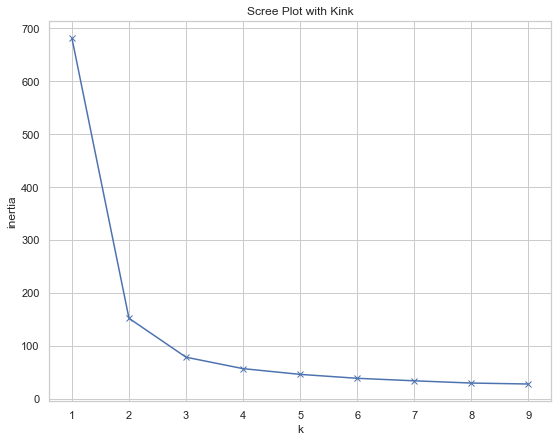

In [17]:
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

# IV. Visualization with PCA(Principal Component Analysis)

> ## 1) target 및 cluster 추가

In [18]:
DF['cluster'] = kmeans_3.labels_
DF['target'] = iris.target 

In [19]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0


> ## 2) 군집 결과 확인

In [20]:
DF.groupby('target')['cluster'].value_counts()

target  cluster
0       1          50
1       0          48
        2           2
2       2          36
        0          14
Name: cluster, dtype: int64

> ## 3) PCA 차원 축소(4차원 -> 2차원)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [22]:
pca_transformed.shape

(150, 2)

> ## 4) pca_x와 pca_y 추가

In [23]:
DF['pca_x'] = pca_transformed[:, 0]
DF['pca_y'] = pca_transformed[:, 1]

In [24]:
DF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


> ## 5) 2차원 시각화

* 군집 값 0, 1, 2 인덱스 추출

In [25]:
idx_0 = DF[DF['cluster'] == 0].index
idx_1 = DF[DF['cluster'] == 1].index
idx_2 = DF[DF['cluster'] == 2].index

In [26]:
idx_0, idx_1, idx_2

(Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'))

* 0, 1, 2 인덱스 시각화 

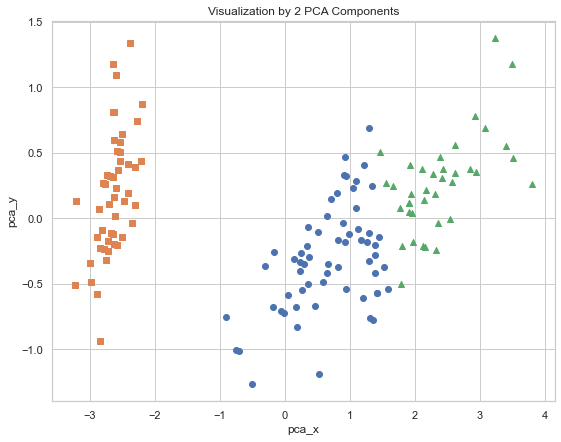

In [27]:
plt.figure(figsize = (9, 7))
plt.scatter(x = DF.loc[idx_0, 'pca_x'], 
            y = DF.loc[idx_0, 'pca_y'], 
            marker = 'o')
plt.scatter(x = DF.loc[idx_1, 'pca_x'], 
            y = DF.loc[idx_1, 'pca_y'], 
            marker = 's')
plt.scatter(x = DF.loc[idx_2, 'pca_x'], 
            y = DF.loc[idx_2, 'pca_y'], 
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()

# 
# 
# 
# The End
# 
# 
# 